# Explore Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv',index_col=0) #

In [3]:
df
#df.head()                             # print the rows of the dataframe
#df.info() 
#df.shape    # print the columns, data type and non null-count
#print(df.describe())                         # print the discritive statistics of the column
#df.corr()
#df.dtypes
#sns.heatmap(df.corr())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
#Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
df['Survived'].value_counts()        # what is value counts? - it counts the value in the specified column



0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

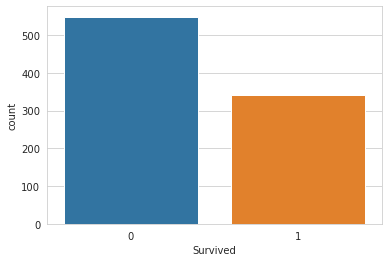

In [5]:
# diplaying as bar plot
#df_survived = df.loc[df['Survived'] ==1]
#df_not_survived = df.loc[df['Survived'] ==0]


#fig, ax = plt.subplots(figsize = (10,6))

#ax.scatter(x=df_survived, y=df_survived, color='red', marker='v', label='Female')

#ax.scatter(x=df_male['body_mass_g'], y=df_male['flipper_length_mm'], 
#           color='blue', marker='o', label='Male')

#ax.set_xlabel('Body Mass (g)', fontsize=14)
#ax.set_ylabel('Flipper Length (mm)', fontsize=14)
#ax.set_title('Flipper Length versus Body Mass for Female and Male Penguins', fontsize=16)
#ax.legend(fontsize=15)
#plt.show()

%matplotlib inline
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', y = None , data= df)


In [6]:
#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
pas_sur = df[(df['Survived'] ==1) & (df['Pclass'] ==1)] # passengers survived in 1st class
total = df[(df['Pclass'] ==1)]
prop = len(pas_sur)/len(total)*100
prop
print('Proportion of first calss survival is', round(prop,3))
len(pas_sur)

Proportion of first calss survival is 62.963


136

<AxesSubplot:xlabel='Pclass', ylabel='count'>

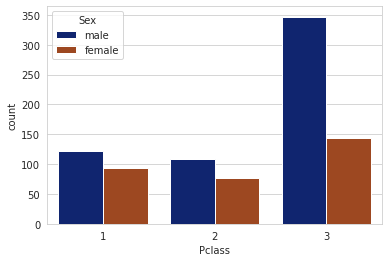

In [7]:
#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
sns.countplot(x = 'Pclass', hue= 'Sex' , data= df, palette = 'dark')



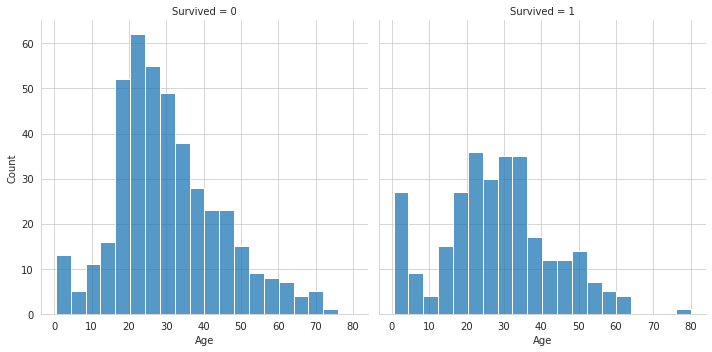

In [8]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.displot(x='Age', col = 'Survived', data = df,  multiple="dodge")


In [9]:
#Calculate the average age for survived and drowned passengers separately.
df.groupby('Survived')['Age'].mean()
#df.groupby('Survived')['Cabin'].mean()      # here cabin values are categorical not numeric, to find the mean we have to convert them into the numerical values

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [10]:
#Replace missing age values by the mean age.
# import numpy as np
# # df[df['Age'].isnull()].head()                       #check the null values
# # # df['Age_null'] = np.where(df['Age'].isnull(),1,0) # here the function helps to replace the null values with 1 and 0
# # # df['Age_null'].mean()
df.Age.fillna(df.Age.mean(), inplace=True)
#df['Age_mean'] = df['Age'].fillna(df['Age'].mean)


In [11]:
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
df.groupby('Pclass')['Survived'].value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [12]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


# Train and test split

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
#df.drop('Cabin',axis=1,inplace=True)

In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

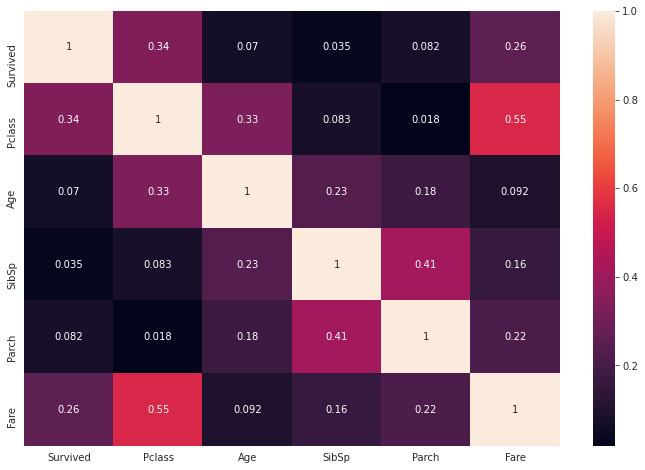

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(), annot = True)

In [18]:
X = df[['Pclass','Age', 'Sex','Fare']]
X

,Pclass,Age,Sex,Fare
PassengerId,,,,
1,3,22.000000,male,7.2500
2,1,38.000000,female,71.2833
3,3,26.000000,female,7.9250
4,1,35.000000,female,53.1000
5,3,35.000000,male,8.0500
...,...,...,...,...
887,2,27.000000,male,13.0000
888,1,19.000000,female,30.0000
889,3,29.699118,female,23.4500


In [19]:
y = df['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## Missing values

In [21]:
X_train.isna().sum()

Pclass    0
Age       0
Sex       0
Fare      0
dtype: int64

In [22]:
X_train.shape

(623, 4)

<AxesSubplot:ylabel='PassengerId'>

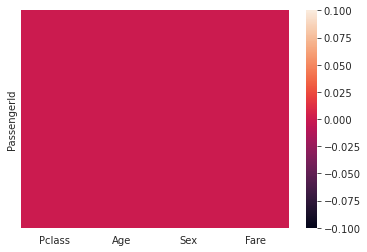

In [23]:
sns.heatmap(X_train.isna(),yticklabels=False)

In [24]:
print(type(X_train))
X_train

<class 'pandas.core.frame.DataFrame'>


,Pclass,Age,Sex,Fare
PassengerId,,,,
509,3,28.000000,male,22.5250
639,3,41.000000,female,39.6875
435,1,50.000000,male,55.9000
291,1,26.000000,female,78.8500
452,3,29.699118,male,19.9667
...,...,...,...,...
227,2,19.000000,male,10.5000
723,2,34.000000,male,13.0000
668,3,29.699118,male,7.7750


## Scaling

In [25]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
# def scaleColumns(df, cols_to_scale):
#     for col in cols_to_scale:
#         df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(X_train[col])),columns= [col])
#     return df
# #X_train_s = scaler.fit_transform(X_train[['Age','Fare']])
# #pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])

In [26]:
# scaled_df = scaleColumns(X_train,['Age','Fare'])
# scaled_df

In [27]:
# X_train_s = pd.DataFrame(X_train_s)

### Coulmn transformer

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_columns = ['Age','Fare']

column_transformer = ColumnTransformer([('ohe',OneHotEncoder(), ['Sex','Pclass']),
                                        ('scaler', MinMaxScaler(), numerical_columns)
])
column_transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(), ['Sex', 'Pclass']),
                                ('scaler', MinMaxScaler(), ['Age', 'Fare'])])

In [29]:
X_train_fe = column_transformer.fit_transform(X_train)
X_test_fe = column_transformer.transform(X_test)

In [30]:
X_train_fe =pd.DataFrame(X_train_fe)
#X_train_s = X_train_s.rename(columns={0 : 'Age', 1: 'Fare'})

In [31]:
X_train_fe

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,1.0,0.393550,0.043966
1,1.0,0.0,0.0,0.0,1.0,0.579053,0.077465
2,0.0,1.0,1.0,0.0,0.0,0.707477,0.109110
3,1.0,0.0,1.0,0.0,0.0,0.365011,0.153905
4,0.0,1.0,0.0,0.0,1.0,0.417796,0.038972
...,...,...,...,...,...,...,...
618,0.0,1.0,0.0,1.0,0.0,0.265126,0.020495
619,0.0,1.0,0.0,1.0,0.0,0.479167,0.025374
620,0.0,1.0,0.0,0.0,1.0,0.417796,0.015176
621,0.0,1.0,0.0,0.0,1.0,0.236587,0.013769


## One-hot encoding

In [32]:
# sex=pd.get_dummies(df['Sex'],drop_first=True)
# embark=pd.get_dummies(df['Embarked'],drop_first=True)


In [33]:
# df = pd.concat([df,sex,embark],axis=1)

In [34]:
# df.head()

In [35]:
# df.reset_index()

In [36]:
# df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [37]:
#df['Age_mean'] = pd.to_numeric(df['Age_mean'], errors='coerce')      # to change a method to numeric

In [38]:
# X = df[['Pclass','SibSp','Parch','Age','Fare','male','Q','S']]

In [39]:
# X

In [40]:
# y = df['Survived'] 

In [41]:
# y

In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [43]:
# X_train
# X_train.isnull().sum()


# Fit through a model

In [44]:
# instatiate the model
m = LogisticRegression(max_iter=1000)

In [45]:
m.fit(X_train_fe,y_train)


LogisticRegression(max_iter=1000)

In [46]:
m.coef_, m.intercept_

(array([[ 1.21745984, -1.21692118,  1.05166548, -0.00866086, -1.04246596,
         -1.77029761,  0.69115096]]),
 array([0.81629428]))

In [47]:
m.score(X_train_fe, y_train)


0.7961476725521669

In [48]:
m.score(X_test_fe, y_test)

0.7910447761194029

# use random forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [51]:
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=10)

In [52]:
rf.score(X_train_fe, y_train)

0.9550561797752809

In [53]:
rf.score(X_test_fe,y_test)

0.8283582089552238

# kaggle submission

In [54]:
df2 = pd.read_csv('../data/test.csv',index_col=0) 

In [55]:
df2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [56]:
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df2.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [58]:
df2.Age.fillna(df2.Age.median(), inplace = True)

In [59]:
df2.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [60]:
numerical_columns = ['Age','Fare']

column_transformer = ColumnTransformer([('ohe',OneHotEncoder(), ['Sex','Pclass']),
                                        ('scaler', MinMaxScaler(), numerical_columns)
])
column_transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(), ['Sex', 'Pclass']),
                                ('scaler', MinMaxScaler(), ['Age', 'Fare'])])

In [61]:
kag_df = df2[['Pclass','Age', 'Sex','Fare']]

In [62]:
kag_df

,Pclass,Age,Sex,Fare
PassengerId,,,,
892,3,34.5,male,7.8292
893,3,47.0,female,7.0000
894,2,62.0,male,9.6875
895,3,27.0,male,8.6625
896,3,22.0,female,12.2875
...,...,...,...,...
1305,3,27.0,male,8.0500
1306,1,39.0,female,108.9000
1307,3,38.5,male,7.2500


In [63]:
kag_df = column_transformer.fit_transform(kag_df)
kag_df=pd.DataFrame(kag_df)
kag_df

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,1.0,0.452723,0.015282
1,1.0,0.0,0.0,0.0,1.0,0.617566,0.013663
2,0.0,1.0,0.0,1.0,0.0,0.815377,0.018909
3,0.0,1.0,0.0,0.0,1.0,0.353818,0.016908
4,1.0,0.0,0.0,0.0,1.0,0.287881,0.023984
...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.353818,0.015713
414,1.0,0.0,1.0,0.0,0.0,0.512066,0.212559
415,0.0,1.0,0.0,0.0,1.0,0.505473,0.014151
416,0.0,1.0,0.0,0.0,1.0,0.353818,0.015713


In [ ]:
ypred = m.predict(kag_df)